In [8]:
import os
import pandas as pd 
import glob
import random 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Goal: Create graph for all Business and agriculture loans

In [9]:
trx = pd.read_csv('../diaries_transactions_all.csv', low_memory=False)

In [10]:
trx.columns

Index(['hh_ids', 'unique_hhs', 'first_trx_date_hh', 'last_trx_date_hh',
       'tot_hh_daysofobs', 'tot_hh_monthsofobs', 'interview_designation',
       'int_date', 'int_month', 'int_year', 'int_yr_mo', 'first_int_date',
       'account_ids', 'unique_accnts', 'm_ids_owner', 'unique_hm_owner',
       'account_bsheet_desig', 'account_startclose_balance', 'account_formal',
       'account_liquid', 'first_trx_date_acc', 'last_trx_date_acc',
       'tot_acc_daysofobs', 'tot_acc_monthsofobs', 'trx_id', 'm_ids_trx',
       'trx_date', 'trx_month', 'trx_year', 'trx_yr_mo', 'trx_dq_round',
       'trx_stdtime_days_hh', 'trx_stdtime_mnths_hh', 'trx_stdtime_days_acc',
       'trx_stdtime_mnths_acc', 'trx_class_code', 'trx_class_desc',
       'trx_family_code', 'trx_family_desc', 'trx_type_code', 'trx_type_desc',
       'trx_prx_purpose', 'trx_prx_purpose_fd', 'trx_fee',
       'trx_bsheet_direction', 'trx_mode_code', 'trx_mode_desc',
       'trx_place_incommunity', 'trx_distance_km', 'trx_outlet'

In [11]:
pd.set_option('display.max_columns',200)

### Subset to Formal Loans: 

In [12]:
frmln_trx = trx.loc[trx['trx_family_code']=='FRMLN']
frmln_trx.shape

(1429, 58)

#### How many individual business or agriculture loans are there? 

In [14]:
frmln_trx.loc[frmln_trx['unique_accnts']==1].trx_type_desc.value_counts()

Individual Business or Agriculture Loan      48
Consumer/ personal loan (not payday loan)    33
Hire Purchase                                24
Joint liability loan                         21
M-SHWARI Loan                                14
School Fees Loan                             12
Group Enterprise Loan                         2
Credit card (including store card)            2
Payday loan                                   2
Student loan                                  1
Name: trx_type_desc, dtype: int64

In [15]:
frmln_trx.loc[frmln_trx['unique_accnts']==1].trx_type_code.value_counts()

2760    48
2762    33
3398    24
3247    21
4219    14
3397    12
2761     2
2746     2
3502     2
2759     1
Name: trx_type_code, dtype: int64

#### Subset to only those formal loans of business or agriculture: 

In [20]:
bus_ag_trx = frmln_trx.loc[frmln_trx['trx_type_code']==2760]

In [21]:
bus_ag_trx.shape

(442, 58)

In [22]:
bus_ag_trx.loc[bus_ag_trx['unique_accnts']==1].shape

(48, 58)

In [23]:
unique_accnt_ids = bus_ag_trx.loc[bus_ag_trx['unique_accnts']==1].account_ids

In [24]:
len(unique_accnt_ids)

48

#### Choose a random loan and look at it: 

In [25]:
random.seed(1)
a = random.choice(list(unique_accnt_ids))

In [26]:
loan_df = bus_ag_trx.loc[bus_ag_trx['account_ids']==a]

In [27]:
loan_df.shape

(14, 58)

In [28]:
loan_df = loan_df.copy()

In [29]:
loan_df.sort_values("trx_stdtime_days_acc", inplace=True)

In [30]:
for index, row in loan_df.iterrows():
    if loan_df.loc[index,"trx_bsheet_direction"]=="Increase":
        loan_df.at[index,"trx_val_dir"] = loan_df.loc[index,"trx_value_kes"]
    elif loan_df.loc[index,"trx_bsheet_direction"]=="Decrease":
        loan_df.at[index,"trx_val_dir"] = -loan_df.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index" + str(index))

Error neither increase nor decrease at index19873
Error neither increase nor decrease at index24068


In [31]:
loan_df[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir
6744,0,40340.0,1. Starting balance (today),NaN,Increase,40340.0
442990,3,4200.0,3. Payments,Outflow,Decrease,-4200.0
443158,33,4034.0,3. Payments,Outflow,Decrease,-4034.0
443184,64,4034.0,3. Payments,Outflow,Decrease,-4034.0
458988,95,4000.0,3. Payments,Outflow,Decrease,-4000.0
443200,123,4034.0,3. Payments,Outflow,Decrease,-4034.0
16866,154,4034.0,3. Payments,Outflow,Decrease,-4034.0
442920,184,4100.0,3. Payments,Outflow,Decrease,-4100.0
443178,215,4034.0,3. Payments,Outflow,Decrease,-4034.0
442985,245,4034.0,3. Payments,Outflow,Decrease,-4034.0


In [32]:
loan_df.insert(59,"bal_evol",np.zeros(loan_df.shape[0]))

In [33]:
s=0
for index,row in loan_df.iterrows():
    s+=loan_df.loc[index,"trx_val_dir"]
    loan_df.at[index,"bal_evol"]=s

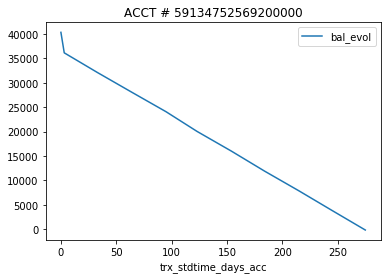

In [34]:
loan_df.plot(x="trx_stdtime_days_acc",y="bal_evol")
plt.title( 'ACCT # '+str(a))
plt_name = 'acct_'+str(a)+'_graph.png'
plt.savefig(plt_name)

In [35]:
loan_df.shape[1]

60

## Cycle through loans and observe their graphs 

0 105136540140100000
Error neither increase nor decrease at index19299
(9, 59)
1 105137049319900000
Error neither increase nor decrease at index3193
(6, 59)
2 56134798164800000
Error neither increase nor decrease at index1078
(9, 59)
3 59134666467600000
Error neither increase nor decrease at index19693
(22, 59)
4 60136436488300000
Error neither increase nor decrease at index17802
(9, 59)
5 60134752045800000
Error neither increase nor decrease at index20002
(8, 59)
6 60134787021500000
Error neither increase nor decrease at index15364
(2, 59)
7 84136514083500000
Error neither increase nor decrease at index5632
(1, 58)
Loan has only 1 entry for 84136514083500000
8 59134752569200000
Error neither increase nor decrease at index19873
Error neither increase nor decrease at index24068
(14, 59)
9 60137430710900000
Error neither increase nor decrease at index27
(6, 59)
10 84136879000800000
Error neither increase nor decrease at index9403
(9, 59)
11 60138558075900000
Error neither increase nor de

/Users/juliacluceru/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


22 105136910664600000
Error neither increase nor decrease at index24917
(5, 59)
23 60134978362300000
Error neither increase nor decrease at index14332
(27, 59)
24 58134763288300000
Error neither increase nor decrease at index5203
(10, 59)
25 59136376033300000
Error neither increase nor decrease at index38535
Error neither increase nor decrease at index4027
(13, 59)
26 59135332895300000
Error neither increase nor decrease at index15424
(13, 59)
27 105137395238900000
Error neither increase nor decrease at index23238
(15, 59)
28 60136500338400000
(2, 59)
29 59135288408400000
Error neither increase nor decrease at index177005
Error neither increase nor decrease at index5984
(4, 59)
30 60136531885600000
Error neither increase nor decrease at index4005
(5, 59)
31 59135900709000000
Error neither increase nor decrease at index6802
(6, 59)
32 59136386375100000
Error neither increase nor decrease at index12641
(11, 59)
33 59136685821800000
Error neither increase nor decrease at index5750
(23, 59

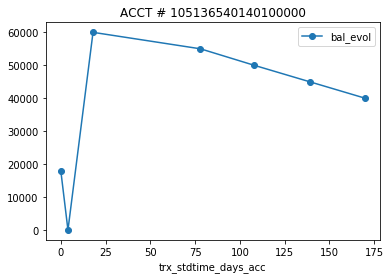

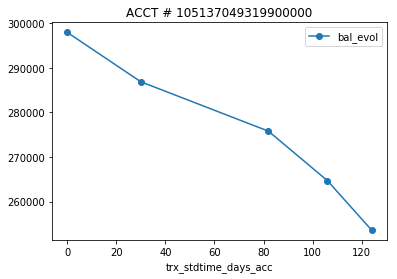

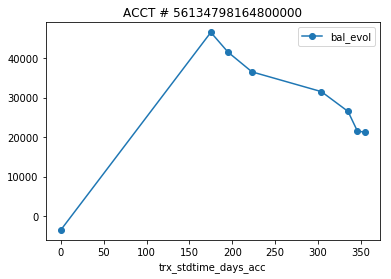

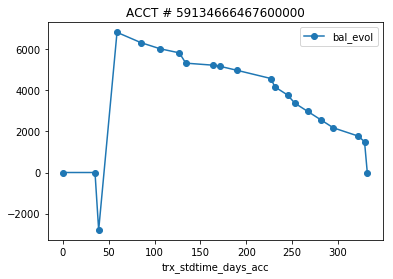

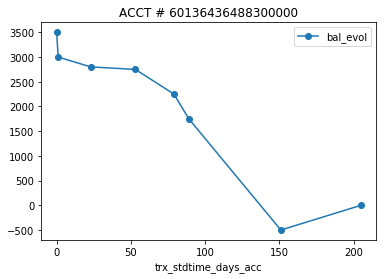

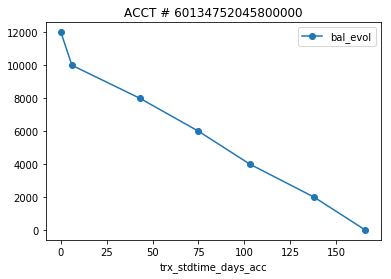

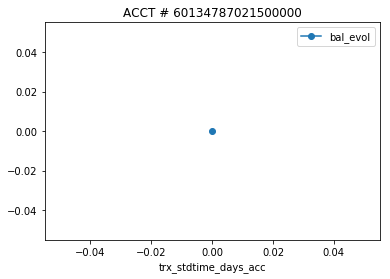

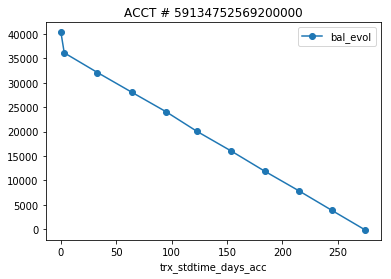

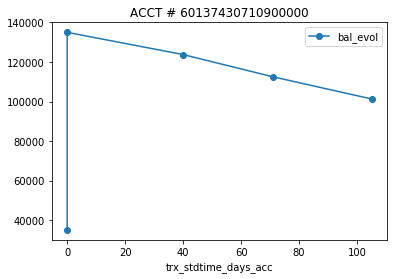

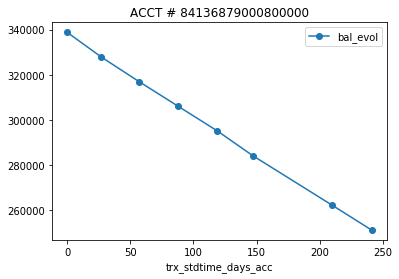

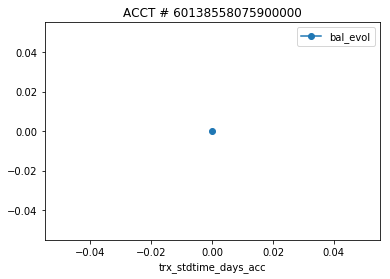

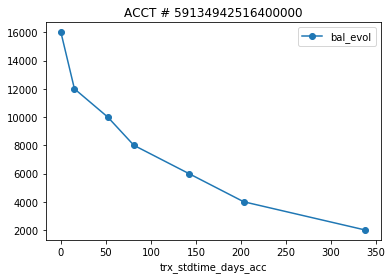

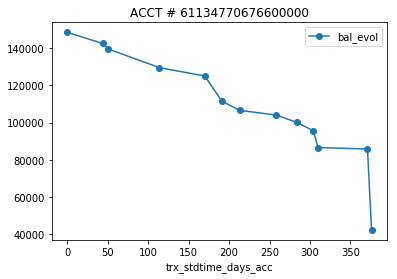

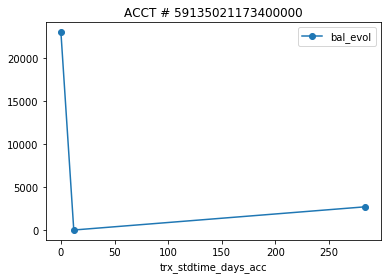

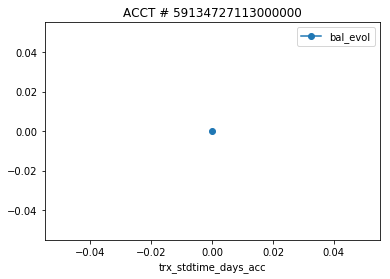

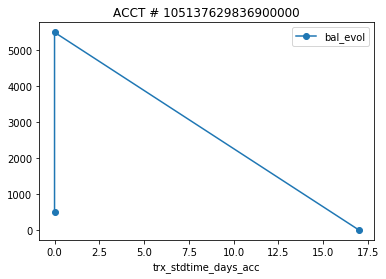

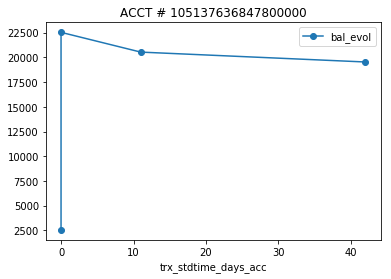

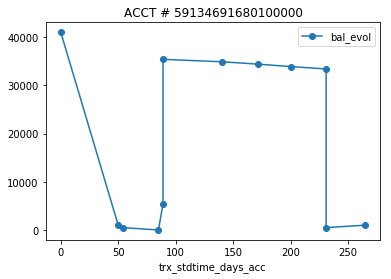

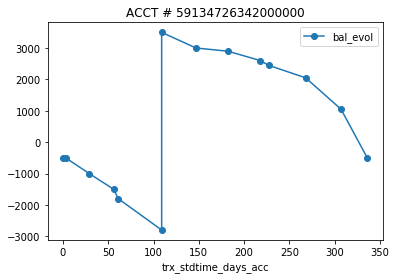

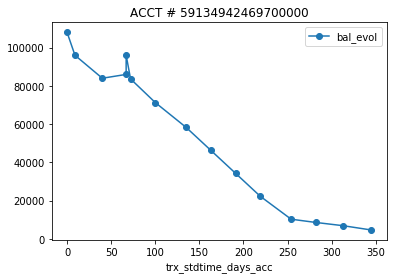

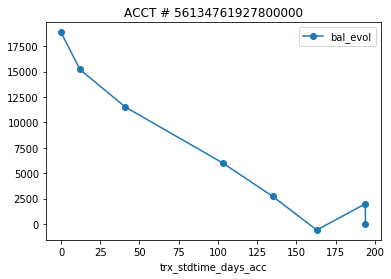

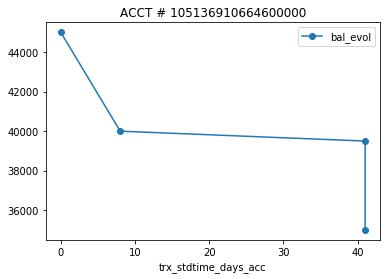

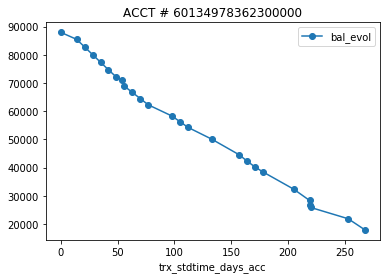

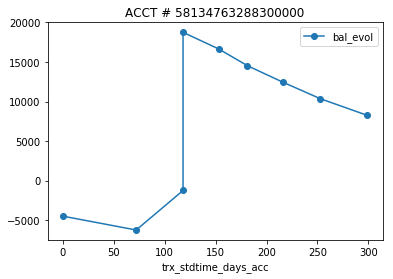

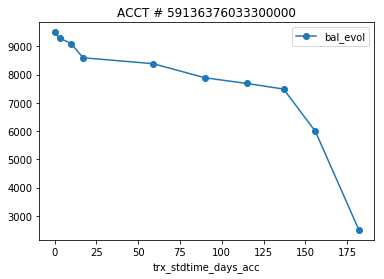

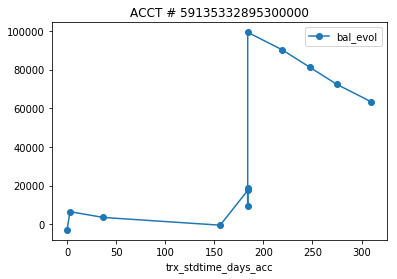

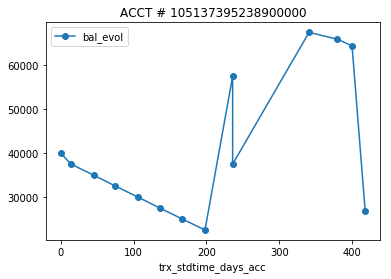

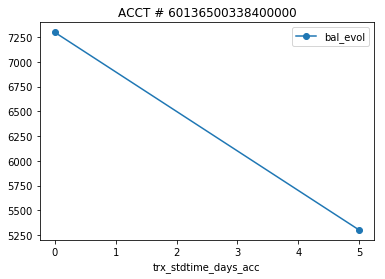

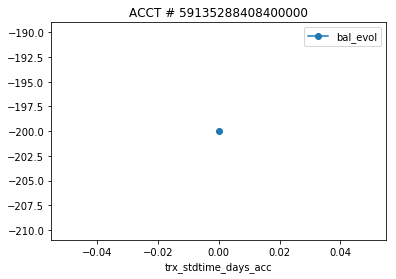

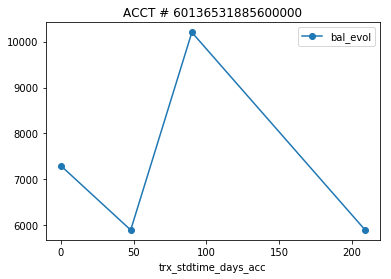

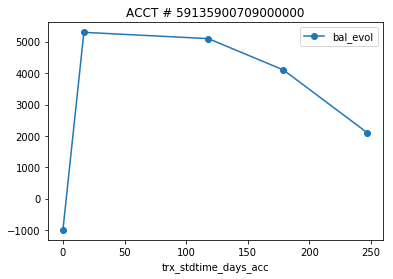

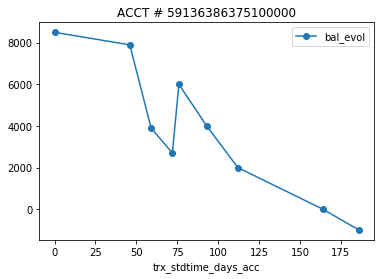

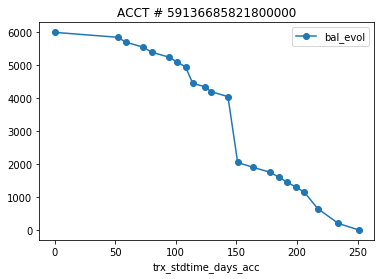

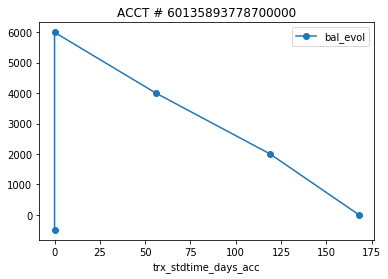

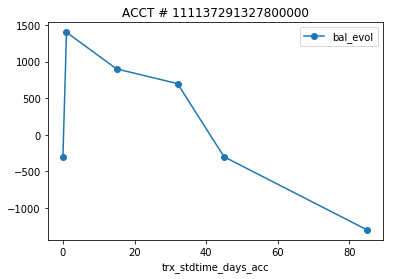

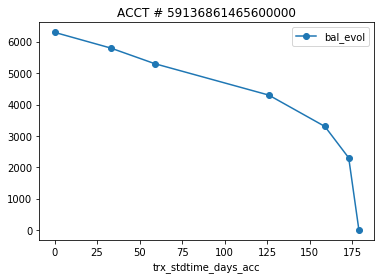

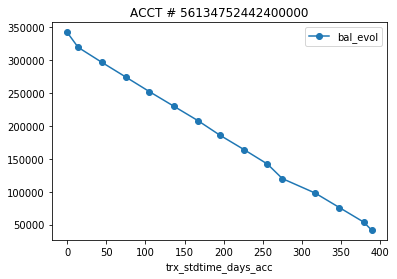

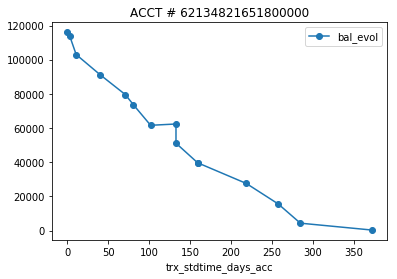

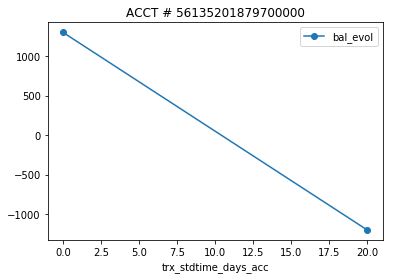

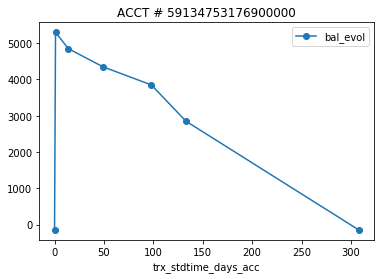

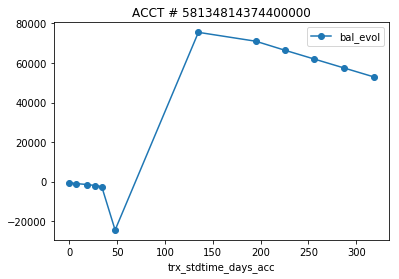

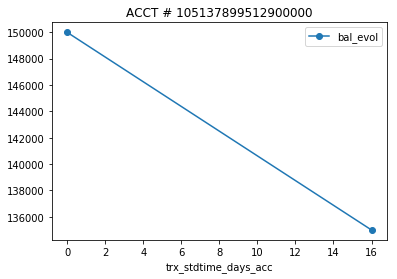

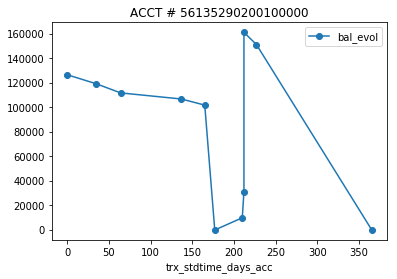

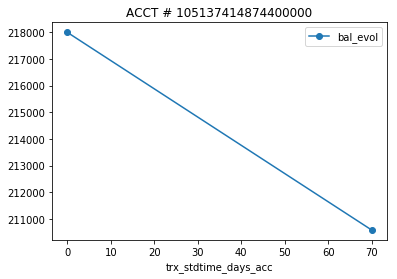

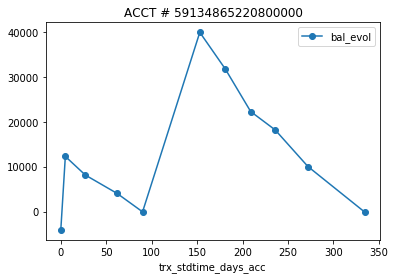

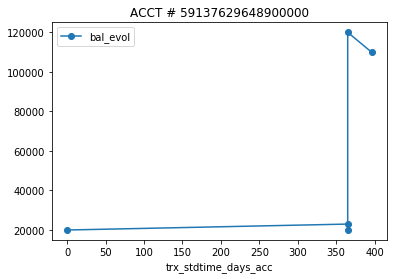

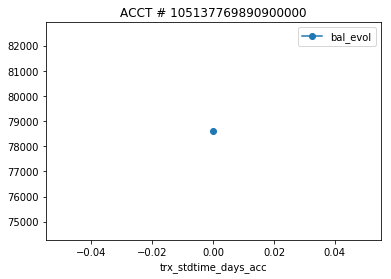

In [36]:
for idx, acct_id in enumerate(list(unique_accnt_ids)):
    print(idx, acct_id)
    loan_df = bus_ag_trx.loc[bus_ag_trx['account_ids']==acct_id]    
    loan_df = loan_df.copy()
    loan_df.sort_values("trx_stdtime_days_acc", inplace=True)
    for index, row in loan_df.iterrows():
        if loan_df.loc[index,"trx_bsheet_direction"]=="Increase":
            loan_df.at[index,"trx_val_dir"] = loan_df.loc[index,"trx_value_kes"]
        elif loan_df.loc[index,"trx_bsheet_direction"]=="Decrease":
            loan_df.at[index,"trx_val_dir"] = -loan_df.loc[index,"trx_value_kes"]
        else:
            print("Error neither increase nor decrease at index" + str(index))
    print(loan_df.shape) 
    if loan_df.shape[0] > 1: 
        loan_df.insert(loan_df.shape[1],"bal_evol",np.zeros(loan_df.shape[0]))
        s=0
        for index,row in loan_df.iterrows():
            s+=loan_df.loc[index,"trx_val_dir"]
            loan_df.at[index,"bal_evol"]=s
        loan_df.plot(x="trx_stdtime_days_acc",y="bal_evol", marker = "o")
        plt.title( 'ACCT # '+str(acct_id))
        plt_name = 'acct_'+str(acct_id)+'_graph.png'
        plt.savefig(plt_name)
    else: 
        print('Loan has only 1 entry for %s' %acct_id)
